In [1]:
# Import all the relevant modules

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from scipy import stats
from scipy import mean

from datetime import datetime 
from dateutil.parser import parse
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Import the Python SQL toolkit and the Object Relational Mapper

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [3]:
# ===========================================================
# CREATE AN ENGINE TO CONNECT TO THE SQLITE DATABASE
# ===========================================================

In [4]:
# Create an engine to connect to the Database

engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [5]:
# ===========================================================
# EXPLORE THE DATABASE "HAWAII.SQLITE" TO GET THE TABLES
# ===========================================================

In [6]:
# Use the Inspector to explore the database and print the table names

inspector = inspect(engine)
tables = inspector.get_table_names()
print(tables)

['measurement', 'station']


In [7]:
# ===========================================================
# EXPLORE THE TABLE "MEASUREMENT" TO GET THE COLUMNS
# ===========================================================

In [8]:
# Use Inspector to print the column names and types

columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
# Use `engine.execute` to select and display the first 10 rows from the table

engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [10]:
# ===========================================================
# EXPLORE THE TABLE "STATION" TO GET THE COLUMNS
# ===========================================================

In [11]:
# Use Inspector to print the column names and types

columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
# Use `engine.execute` to select and display the first 10 rows from the table

engine.execute('SELECT * FROM station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [13]:
# ===========================================================
# REFLECT THE DATABASE "HAWAII.SQLITE" INTO AN ORM MODEL
# ===========================================================

In [14]:
# Reflect the Database into ORM class

Base = automap_base()
Base.prepare(engine, reflect=True)

In [15]:
# ===========================================================
# VIEW THE CLASSES FOUND BY AUTOMAP
# ===========================================================

In [16]:
# View all of the classes that automap found
# Print all of the classes mapped to the Base

Base.classes.keys()

['measurement', 'station']

In [17]:
# ===========================================================
# SAVE REFERENCES TO EACH DATABASE TABLE
# ===========================================================

In [18]:
# Save references to each table

Measurement = Base.classes.measurement
Station = Base.classes.station

In [19]:
# ===========================================================
# START A SESSION TO QUERY THE DATABASE
# ===========================================================

In [20]:
# Start a session to query the database
# Create our session (link) from Python to the DB

session = Session(engine)

# Exploratory Climate Analysis

In [21]:
## =========================================================================
## =========================================================================
## START OF PRECIPITATION ANALYSIS
## =========================================================================
## =========================================================================

In [22]:
# Query the measurement table and save the results into results_all_ms

results_all_ms = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).all()

In [23]:
# Print the type of the results returned from the query

print(type(results_all_ms))

<class 'list'>


In [24]:
# Verify that the correct columns were returned by the query

print(results_all_ms[0].keys())

['id', 'station', 'date', 'prcp', 'tobs']


In [25]:
# Print the actual output returned by the query 

print(results_all_ms)

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0), (2, 'USC00519397', '2010-01-02', 0.0, 63.0), (3, 'USC00519397', '2010-01-03', 0.0, 74.0), (4, 'USC00519397', '2010-01-04', 0.0, 76.0), (5, 'USC00519397', '2010-01-06', None, 73.0), (6, 'USC00519397', '2010-01-07', 0.06, 70.0), (7, 'USC00519397', '2010-01-08', 0.0, 64.0), (8, 'USC00519397', '2010-01-09', 0.0, 68.0), (9, 'USC00519397', '2010-01-10', 0.0, 73.0), (10, 'USC00519397', '2010-01-11', 0.01, 64.0), (11, 'USC00519397', '2010-01-12', 0.0, 61.0), (12, 'USC00519397', '2010-01-14', 0.0, 66.0), (13, 'USC00519397', '2010-01-15', 0.0, 65.0), (14, 'USC00519397', '2010-01-16', 0.0, 68.0), (15, 'USC00519397', '2010-01-17', 0.0, 64.0), (16, 'USC00519397', '2010-01-18', 0.0, 72.0), (17, 'USC00519397', '2010-01-19', 0.0, 66.0), (18, 'USC00519397', '2010-01-20', 0.0, 66.0), (19, 'USC00519397', '2010-01-21', 0.0, 69.0), (20, 'USC00519397', '2010-01-22', 0.0, 67.0), (21, 'USC00519397', '2010-01-23', 0.0, 67.0), (22, 'USC00519397', '2010-01-24', 0.01

In [26]:
# Verify that the first row returned in the query is id=1 
# (because in the underlying csv file, the rows start with id = 1)

print(results_all_ms[0])

(1, 'USC00519397', '2010-01-01', 0.08, 65.0)


In [27]:
# Verify that the last row returned in the query is id=19550 
# (because in the underlying csv file there are 19550 rows)

print(results_all_ms[-1])

(19550, 'USC00516128', '2017-08-23', 0.45, 76.0)


In [28]:
# Get the last date from the table
# Verify that it is = 2017-08-23

date_latest = results_all_ms[-1][2]
print(date_latest)

2017-08-23


In [29]:
# Format the date column

date_latest_formatted = datetime.strptime(date_latest, '%Y-%m-%d')
print(date_latest_formatted)

2017-08-23 00:00:00


In [30]:
# Calculate the date one year prior to the latest date in the table
# Verify that it is = 2016-08-23 (one year prior to 2017-08-23)

one_year_ago = date_latest_formatted - relativedelta(years=1)
print(one_year_ago)

2016-08-23 00:00:00


In [31]:
# Calculate the date one day prior to the date which is one year 
# prior to the latest date in the table
# We need this for the query

one_year_ago_minus_one_day = one_year_ago - relativedelta(days=1)
print(one_year_ago_minus_one_day)

2016-08-22 00:00:00


In [32]:
# Perform a query to retrieve the dates and the precipitation scores 
# for the data one year prior to the latest date

results_last_year_ms = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > one_year_ago_minus_one_day).all()

print(results_last_year_ms)

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [33]:
# Verify that the first date returned from the query is 2016-08-23

print(results_last_year_ms[0])

('2016-08-23', 0.0)


In [34]:
# Verify that the last date returned from the query is 2017-08-23

print(results_last_year_ms[-1])

('2017-08-23', 0.45)


In [35]:
# Check all the dates that were returned from the query

last_year_ms_dates =[i[0] for i in results_last_year_ms]
print(last_year_ms_dates)

['2016-08-23', '2016-08-24', '2016-08-25', '2016-08-26', '2016-08-27', '2016-08-28', '2016-08-29', '2016-08-30', '2016-08-31', '2016-09-01', '2016-09-02', '2016-09-03', '2016-09-04', '2016-09-05', '2016-09-06', '2016-09-07', '2016-09-08', '2016-09-09', '2016-09-10', '2016-09-11', '2016-09-12', '2016-09-13', '2016-09-14', '2016-09-15', '2016-09-16', '2016-09-17', '2016-09-18', '2016-09-19', '2016-09-20', '2016-09-21', '2016-09-22', '2016-09-23', '2016-09-24', '2016-09-25', '2016-09-26', '2016-09-27', '2016-09-28', '2016-09-29', '2016-09-30', '2016-10-01', '2016-10-02', '2016-10-03', '2016-10-04', '2016-10-05', '2016-10-06', '2016-10-07', '2016-10-08', '2016-10-09', '2016-10-10', '2016-10-11', '2016-10-12', '2016-10-13', '2016-10-14', '2016-10-15', '2016-10-16', '2016-10-17', '2016-10-18', '2016-10-19', '2016-10-20', '2016-10-21', '2016-10-22', '2016-10-23', '2016-10-24', '2016-10-25', '2016-10-26', '2016-10-27', '2016-10-28', '2016-10-29', '2016-10-30', '2016-10-31', '2016-11-01', '2016

In [36]:
# Check all the precipitation levels that were returned from the query

last_year_ms_prcp =[i[1] for i in results_last_year_ms]
print(last_year_ms_prcp)

[0.0, 0.08, 0.08, 0.0, 0.0, 0.01, 0.0, 0.0, 0.13, 0.0, 0.0, 0.0, 0.03, None, None, 0.05, 0.0, 0.03, 0.0, 0.05, 0.0, 0.02, 1.32, 0.42, 0.06, 0.05, 0.0, 0.0, 0.0, 0.0, 0.02, 0.0, 0.0, 0.0, 0.06, 0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0, 0.0, 0.05, 0.15, 0.01, 0.0, 0.03, 0.0, 0.0, 0.0, 0.0, 0.24, 0.03, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03, 0.05, 0.01, 0.13, 0.14, 0.05, 0.05, 0.05, 0.0, 0.01, 0.0, 0.14, 0.12, 0.03, 0.0, 0.03, 0.43, 0.02, 0.0, 0.03, 0.52, 0.05, 0.04, 0.01, 0.05, 0.03, 0.0, 0.0, 0.01, 0.13, 0.01, 0.0, 0.0, 0.01, 0.01, 0.01, 0.0, 0.02, 0.0, 0.02, 0.04, 0.12, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.16, 0.0, 0.04, 0.03, 0.0, 0.0, 0.0, 0.18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.51, 0.0, 0.0, 0.0, 0.31, 2.62, 0.01, 0.0, 0.0, 0.07, 0.0, 0.0, 0.0, 0.0, 0.06, 0.06, 0.01, 0.0

In [37]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

last_year_ms_df = pd.DataFrame(results_last_year_ms, columns=['date', 'prcp'])
last_year_ms_df = last_year_ms_df.sort_values(["date"], ascending=True)
last_year_ms_df.set_index('date', inplace=True, )


In [38]:
# Check the first 5 rows of the DataFrame
# The first row should be 2016-08-23

last_year_ms_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


In [39]:
# Check the last 5 rows of the DataFrame
# The last row should be 2017-08-23

last_year_ms_df.tail()

,prcp
date,
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45


In [40]:
# Check the shape (rows, columns) of the DataFrame

last_year_ms_df.shape

(2230, 1)

In [41]:
# Check the count of rows in the DataFrame with values 
# If this equals 2230, then we do not have any Null values
# If this is less than 2230, then it implies that we do have some Null values

last_year_ms_df.count()

prcp    2021
dtype: int64

In [42]:
# Check for NUll values
# This should equal 209 (2230 - 2021)

last_year_ms_df.isnull().sum()

prcp    209
dtype: int64

In [43]:
# Drop the NUll values

last_year_ms_df = last_year_ms_df.dropna(how='any')

In [44]:
# Re-run the check for Null values
# There should be no Null values

last_year_ms_df.isnull().sum()

prcp    0
dtype: int64

In [45]:
# Re-check the shape (rows, columns) of the DataFrame
# This should now be 2021 rows and 1 column 

last_year_ms_df.shape

(2021, 1)

In [46]:
# Re-check the count of rows in the DataFrame with values 
# This should be 2021 

last_year_ms_df.count()

prcp    2021
dtype: int64

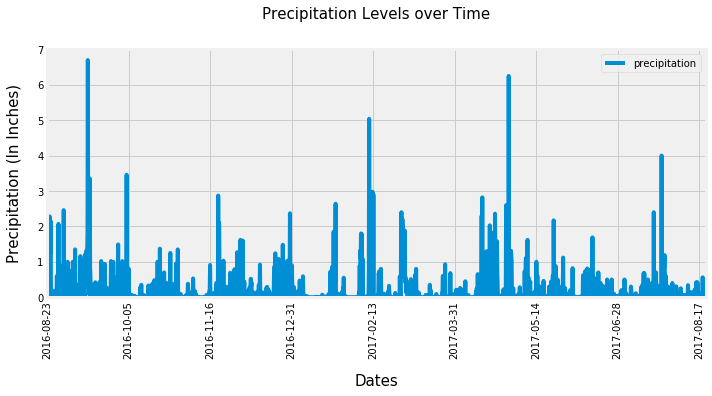

In [47]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = last_year_ms_df.plot.line(y='prcp', label ="precipitation")

# Assign a label to the X Axis:
ax.set_xlabel("Dates", fontsize=15, labelpad = 15)

# Assign a label to the Y Axis:
ax.set_ylabel("Precipitation (In Inches)", fontsize=15, labelpad = 15)

# Assign a title to the Line Chart:
ax.set_title('Precipitation Levels over Time', fontsize=15)
ax.title.set_position([0.5, 1.1])

# Suppress the Legend:
ax.legend(loc = "upper right")

# Set Limits for the Y Axis:
ax.set_ylim((0, 7))


# Format the ticks:
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)
plt.tick_params(axis='y', which='major', labelsize=10)


fig= plt.gcf()
fig.subplots_adjust(bottom=0.45)
fig.set_size_inches(10, 5.5)     
 

# Save the Line Chart in the Output folder:
plt.savefig("Output/LINE_CHART_Precipitation_Levels.png", type="png",dpi=300)


# Display the Line Chart:
plt.tight_layout()
plt.show()

In [48]:
# Use Pandas to calculate the summary statistics for the precipitation data

last_year_ms_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [49]:
#=============
# Analysis:
#=============

# We had a total of 2021 precipitation observations during this period.
# The lowest precipitation was 0 inches.
# The highest precipitation was 6.7 inches.
# The mean precipitation was 0.177 inches.
# The standard deviation of the precipitation was 0.46 inches.


In [50]:
## =========================================================================
## =========================================================================
## END OF PRECIPITATION ANALYSIS
## =========================================================================
## =========================================================================

In [51]:
## =========================================================================
## =========================================================================
## START OF STATION ANALYSIS
## =========================================================================
## =========================================================================

In [52]:
# Query the station table and save the results into results_all_st

results_all_st = session.query(Station.id, Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation).all()

print(results_all_st)

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0), (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6), (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0), (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9), (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6), (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5), (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9), (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9), (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]


In [53]:
# Print the type of the results returned from the query

print(type(results_all_st))

<class 'list'>


In [54]:
# # Verify that the correct columns were returned by the query

print(results_all_st[0].keys())

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']


In [55]:
# Verify that the first row returned in the query is id=1 
# (because in the underlying csv file, the rows start with id = 1)

print(results_all_st[0])

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)


In [56]:
# Verify that the last row returned in the query is id=9 
# (because in the underlying csv file, there are 9 rows)

print(results_all_st[-1])

(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


In [57]:
# Calculate the total number of stations. This should be 9
# (because in the undelrying csv file, there are 9 rows)

results_st_count = session.query(Station.station).count()
print(results_st_count)
print()
print()
for i in results_all_st:
    print(i[0], i[1], i[2])

9


1 USC00519397 WAIKIKI 717.2, HI US
2 USC00513117 KANEOHE 838.1, HI US
3 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US
4 USC00517948 PEARL CITY, HI US
5 USC00518838 UPPER WAHIAWA 874.3, HI US
6 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US
7 USC00519281 WAIHEE 837.5, HI US
8 USC00511918 HONOLULU OBSERVATORY 702.2, HI US
9 USC00516128 MANOA LYON ARBO 785.2, HI US


In [58]:
#==============
# Analysis
#=============

# There are a total of 9 stations in this dataset
# 1 USC00519397 WAIKIKI 717.2, HI US
# 2 USC00513117 KANEOHE 838.1, HI US
# 3 USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US
# 4 USC00517948 PEARL CITY, HI US
# 5 USC00518838 UPPER WAHIAWA 874.3, HI US
# 6 USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US
# 7 USC00519281 WAIHEE 837.5, HI US
# 8 USC00511918 HONOLULU OBSERVATORY 702.2, HI US
# 9 USC00516128 MANOA LYON ARBO 785.2, HI US


In [59]:
## =========================================================================
## MOST ACTIVE STATIONS -- SORTED BASED ON TOTAL NUMBER OF OBSERVATIONS
## =========================================================================

In [60]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List all the stations and the counts in descending order.

active_stations = [Measurement.station, func.count(Measurement.station)]

results_most_active_st = session.query(*active_stations).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

results_most_active_st

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [61]:
## =========================================================================
## THE MOST ACTIVE STATION - - STATION WITH THE HIGHEST NUMBER OF TOTAL OBSERVATIONS
## =========================================================================

In [62]:
# Print the type of the results returned from the query

print(type(results_most_active_st))

<class 'list'>


In [63]:
# Print the station from the first row of the returned query
# This should be station 'USC00519281'

results_most_active_st[0][0]

'USC00519281'

In [64]:
#==============
# Analysis
#=============

# The most active stationw as “USC00519281”, which corresponds to “WAIHEE 837.5, HI, US”
# This station had 2772 rows in the dataset

In [65]:
## =========================================================================
## LOWEST TEMPERATURE FOR THE MOST ACTIVE STATION ('USC00519281')
## =========================================================================

In [66]:
# Query for the lowest temperature observed for ALL stations

lowest_temp = [Measurement.station, func.min(Measurement.tobs)]

results_lowest_temperature_all_st = session.query(*lowest_temp).\
    group_by(Measurement.station).\
    order_by(func.min(Measurement.tobs).desc()).all()

results_lowest_temperature_all_st

[('USC00513117', 59.0),
 ('USC00518838', 58.0),
 ('USC00517948', 58.0),
 ('USC00516128', 58.0),
 ('USC00514830', 58.0),
 ('USC00519523', 56.0),
 ('USC00519397', 56.0),
 ('USC00519281', 54.0),
 ('USC00511918', 53.0)]

In [67]:
# Using the station id from the previous query, calculate 
# the lowest temperature recorded for the most active station 
# We are specifying the Most Active Station by its ID directly
# The station ID should be 'USC00519281'
# The temperature should be 54.0

results_lowest_temperature_most_active_st = session.query(*lowest_temp).\
    filter(Measurement.station == 'USC00519281').\
    group_by(Measurement.station).\
    order_by(func.min(Measurement.tobs).desc()).all()

results_lowest_temperature_most_active_st

[('USC00519281', 54.0)]

In [68]:
# Using the station id from the previous query, calculate 
# the lowest temperature recorded for the most active station 
# We are specifying the Most Active Station by referring to it from its position in the query "results_most_active_st"
# The station ID should be 'USC00519281'
# The temperature should be 54.0

results_lowest_temperature_most_active_st_new = session.query(*lowest_temp).\
    filter(Measurement.station == results_most_active_st[0][0]).\
    group_by(Measurement.station).\
    order_by(func.min(Measurement.tobs).desc()).all()

results_lowest_temperature_most_active_st_new

[('USC00519281', 54.0)]

In [69]:
## =========================================================================
## HIGHEST TEMPERATURE FOR THE MOST ACTIVE STATION ('USC00519281')
## =========================================================================

In [70]:
# Query for the highest temperature observed for ALL stations

highest_temp = [Measurement.station, func.max(Measurement.tobs)]

results_highest_temperature_all_st = session.query(*highest_temp).\
    group_by(Measurement.station).\
    order_by(func.max(Measurement.tobs).desc()).all()

results_highest_temperature_all_st

[('USC00519397', 87.0),
 ('USC00517948', 87.0),
 ('USC00511918', 87.0),
 ('USC00519523', 85.0),
 ('USC00519281', 85.0),
 ('USC00514830', 85.0),
 ('USC00513117', 85.0),
 ('USC00516128', 84.0),
 ('USC00518838', 83.0)]

In [71]:
# Using the station id from the previous query, calculate 
# the highest temperature recorded for the most active station 
# We are specifying the Most Active Station by its ID directly
# The station ID should be 'USC00519281'
# The temperature should be 85.0

results_highest_temperature_most_active_st = session.query(*highest_temp).\
    filter(Measurement.station == 'USC00519281').\
    group_by(Measurement.station).\
    order_by(func.max(Measurement.tobs).desc()).all()

results_highest_temperature_most_active_st

[('USC00519281', 85.0)]

In [72]:
# Using the station id from the previous query, calculate 
# the highest temperature recorded for the most active station 
# We are specifying the Most Active Station by referring to it from its position in the query "results_most_active_st"
# The station ID should be 'USC00519281'
# The temperature should be 85.0

highest_temp = [Measurement.station, func.max(Measurement.tobs)]

results_highest_temperature_most_active_st_new = session.query(*highest_temp).\
    filter(Measurement.station == results_most_active_st[0][0]).\
    group_by(Measurement.station).\
    order_by(func.max(Measurement.tobs).desc()).all()

results_highest_temperature_most_active_st_new

[('USC00519281', 85.0)]

In [73]:
## =========================================================================
## AVERAGE TEMPERATURE FOR THE MOST ACTIVE STATION ('USC00519281')
## =========================================================================

In [74]:
# Query for the average temperature observed for ALL stations

average_temp = [Measurement.station, func.avg(Measurement.tobs)]

results_average_temperature_all_st = session.query(*average_temp).\
    group_by(Measurement.station).\
    order_by(func.avg(Measurement.tobs).desc()).all()

results_average_temperature_all_st

[('USC00514830', 74.8732970027248),
 ('USC00517948', 74.68440233236151),
 ('USC00519397', 74.55323054331865),
 ('USC00519523', 74.5436493068565),
 ('USC00518838', 72.72407045009784),
 ('USC00513117', 72.68918420081211),
 ('USC00519281', 71.66378066378067),
 ('USC00511918', 71.61596766043456),
 ('USC00516128', 70.91500765696784)]

In [75]:
# Using the station id from the previous query, calculate 
# the average temperature of the most active station
# We are specifying the Most Active Station by its ID directly
# The station ID should be 'USC00519281'
# The temperature should be 71.6637

results_average_temperature_most_active_st = session.query(*average_temp).\
    filter(Measurement.station == 'USC00519281').\
    group_by(Measurement.station).\
    order_by(func.avg(Measurement.tobs).desc()).all()

results_average_temperature_most_active_st

[('USC00519281', 71.66378066378067)]

In [76]:
# Using the station id from the previous query, calculate 
# the average temperature of the most active station
# We are specifying the Most Active Station by referring to it from its position in the query "results_most_active_st"
# The station ID should be 'USC00519281'
# The temperature should be 71.6637

results_average_temperature_most_active_st_new = session.query(*average_temp).\
    filter(Measurement.station == results_most_active_st[0][0]).\
    group_by(Measurement.station).\
    order_by(func.avg(Measurement.tobs).desc()).all()

results_average_temperature_most_active_st_new

[('USC00519281', 71.66378066378067)]

In [77]:
#==============
# Analysis
#=============

# The most active stationw as “USC00519281”, which corresponds to “WAIHEE 837.5, HI, US”
# This station had 2772 rows in the dataset
# The minimum temperature observed for this station was 54.00 degrees Farenheit.
# The average temperature observed for this station was 71.66 degrees Farenheit.
# The maximum temperature observed for this station was 85.00 degrees Farenheit.


In [78]:
## ==================================================================================
## LAST 12 MONTHS OF TEMP OBSERVATIONS FOR THE MOST ACTIVE STATION ('USC00519281')
## ==================================================================================

In [79]:
# Query for the last 12 months of temperature observation data for ALL stations

results_last_year_tobs_all_st = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= one_year_ago_minus_one_day).all()

results_last_year_tobs_all_st

[('2016-08-23', 81.0),
 ('2016-08-24', 79.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 79.0),
 ('2016-08-27', 77.0),
 ('2016-08-28', 78.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 79.0),
 ('2016-08-31', 80.0),
 ('2016-09-01', 81.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 79.0),
 ('2016-09-04', 75.0),
 ('2016-09-05', 79.0),
 ('2016-09-06', 76.0),
 ('2016-09-07', 76.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 78.0),
 ('2016-09-11', 76.0),
 ('2016-09-12', 78.0),
 ('2016-09-13', 78.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 80.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 81.0),
 ('2016-09-19', 77.0),
 ('2016-09-20', 77.0),
 ('2016-09-21', 78.0),
 ('2016-09-22', 76.0),
 ('2016-09-23', 82.0),
 ('2016-09-24', 81.0),
 ('2016-09-25', 78.0),
 ('2016-09-26', 80.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 79.0),
 ('2016-09-29', 80.0),
 ('2016-09-30', 80.0),
 ('2016-10-01', 80.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [80]:
# Query for the last 12 months of temperature observation data for the most active station
# We are specifying the Most Active Station by its ID directly

results_last_year_tobs_most_active_st = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= one_year_ago_minus_one_day).\
    filter(Measurement.station == 'USC00519281').all()

results_last_year_tobs_most_active_st

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [81]:
# Query for the last 12 months of temperature observation data for the most active station
# We are specifying the Most Active Station by referring to it from its position in the query "results_most_active_st"

results_last_year_tobs_most_active_st_new = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= one_year_ago_minus_one_day).\
    filter(Measurement.station == results_most_active_st[0][0]).all()

results_last_year_tobs_most_active_st_new

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [82]:
# Save the query results as a Pandas DataFrame 
# Sort the dataframe by date

last_year_tobs_most_active_st_df = pd.DataFrame(results_last_year_tobs_most_active_st_new, columns=['date', 'tobs'])
last_year_tobs_most_active_st_df = last_year_tobs_most_active_st_df.sort_values(["date"], ascending=True)

In [83]:
# Verify the first 5 rows of the DataFrame
# The first row should have date = 2016-08-23

last_year_tobs_most_active_st_df.head()

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


In [84]:
# Verify the last 5 rows of the DataFrame
# The last row should have date = 2017-08-18

last_year_tobs_most_active_st_df.tail()

,date,tobs
347,2017-08-14,77.0
348,2017-08-15,77.0
349,2017-08-16,76.0
350,2017-08-17,76.0
351,2017-08-18,79.0


In [85]:
# Check for NUll values

last_year_tobs_most_active_st_df.isnull().sum()

date    0
tobs    0
dtype: int64

In [86]:
# Use Pandas to calculate the summary statistics for the temperature data

last_year_tobs_most_active_st_df.describe()

,tobs
count,352.000000
mean,73.107955
std,4.733315
min,59.000000
25%,70.000000
50%,74.000000
75%,77.000000
max,83.000000


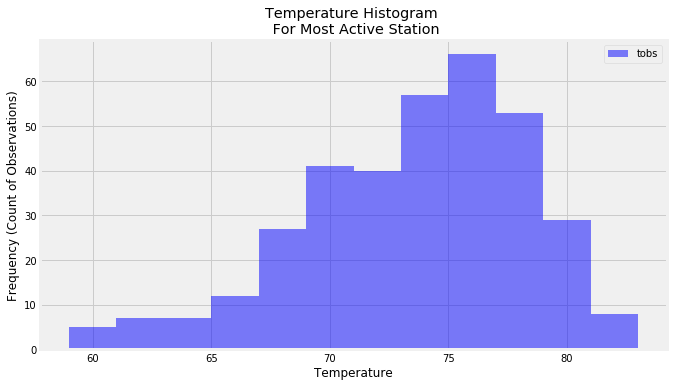

In [87]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Plot a Histogram:
ax = last_year_tobs_most_active_st_df.plot.hist(bins=12, alpha=0.5, color = "b")

# Assign a label to the X Axis:
plt.xlabel("Temperature")

# Assign a label to the Y Axis:
plt.ylabel("Frequency (Count of Observations)")

# Assign a title to the Histogram:
plt.title("Temperature Histogram \n For Most Active Station")

fig= plt.gcf()
fig.subplots_adjust(bottom=0.45)
fig.set_size_inches(10, 10) 

# Save the Histogram in the Output folder:
plt.savefig("Output/HISTOGRAM_Temperature_for _Most_Active_Station.png")

# Display the Histogram:
plt.show()

In [88]:
#==============
# Analysis
#=============

# As was analyzed in the previous section, the most active stationw as “USC00519281”, which corresponds to “WAIHEE 837.5, HI, US”
# For this Station, for the last 12 months: 
# The minimum temperature observed for this station was 59.00 degrees Farenheit.
# The average temperature observed for this station was 73.11 degrees Farenheit.
# The maximum temperature observed for this station was 83.00 degrees Farenheit.
# The Histogram "bin" or bucket with the highest number of observations was Temperature 75 to 77.


## Bonus Challenge Assignment

In [89]:
## =========================================================================
## TEMPERATURE ANALYSIS I
## =========================================================================

In [90]:
# Query for all dates matching the 
# following date string in the format `%m`
month_str_june = "06"

results_temp_june_all_years = session.query(Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == month_str_june).all()

results_temp_june_all_years

[(78.0),
 (76.0),
 (78.0),
 (76.0),
 (77.0),
 (78.0),
 (77.0),
 (78.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (78.0),
 (78.0),
 (77.0),
 (77.0),
 (82.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (76.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (78.0),
 (73.0),
 (70.0),
 (76.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (78.0),
 (77.0),
 (77.0),
 (78.0),
 (78.0),
 (77.0),
 (78.0),
 (78.0),
 (75.0),
 (76.0),
 (76.0),
 (77.0),
 (78.0),
 (76.0),
 (77.0),
 (75.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (77.0),
 (77.0),
 (76.0),
 (78.0),
 (77.0),
 (76.0),
 (77.0),
 (76.0),
 (76.0),
 (77.0),
 (77.0),
 (78.0),
 (77.0),
 (77.0),
 (77.0),
 (76.0),
 (75.0),
 (76.0),
 (76.0),
 (77.0),
 (76.0),
 (73.0),
 (73.0),
 (75.0),
 (77.0),
 (76.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (79.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (77.0),
 (78.0),
 (77.0),
 (76.0),
 (78.0),
 (78.0),
 (77.0),
 (78.0),
 (78.0),
 (73.0),
 (76.0),
 (77.0),
 (75.0),
 (76.0),
 (74.0),
 

In [91]:
# Calculate the mean temperature for June for all years 

mean_temp_jun_all_years = mean(results_temp_june_all_years)

print(mean_temp_jun_all_years)

74.94411764705882


In [92]:
# Query for all dates matching the 
# following date string in the format `%m`

month_str_dec = "12"

results_temp_dec_all_years = session.query(Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == month_str_dec).all()

results_temp_dec_all_years

[(76.0),
 (74.0),
 (74.0),
 (64.0),
 (64.0),
 (67.0),
 (77.0),
 (66.0),
 (69.0),
 (68.0),
 (68.0),
 (71.0),
 (74.0),
 (67.0),
 (66.0),
 (69.0),
 (71.0),
 (70.0),
 (70.0),
 (74.0),
 (74.0),
 (71.0),
 (75.0),
 (75.0),
 (72.0),
 (69.0),
 (68.0),
 (73.0),
 (74.0),
 (73.0),
 (73.0),
 (73.0),
 (73.0),
 (71.0),
 (73.0),
 (73.0),
 (77.0),
 (72.0),
 (71.0),
 (73.0),
 (70.0),
 (73.0),
 (69.0),
 (74.0),
 (72.0),
 (71.0),
 (72.0),
 (72.0),
 (70.0),
 (73.0),
 (73.0),
 (72.0),
 (73.0),
 (73.0),
 (72.0),
 (63.0),
 (65.0),
 (71.0),
 (76.0),
 (70.0),
 (76.0),
 (69.0),
 (69.0),
 (69.0),
 (74.0),
 (76.0),
 (74.0),
 (73.0),
 (73.0),
 (74.0),
 (73.0),
 (73.0),
 (73.0),
 (74.0),
 (74.0),
 (71.0),
 (73.0),
 (72.0),
 (64.0),
 (66.0),
 (73.0),
 (72.0),
 (65.0),
 (64.0),
 (69.0),
 (68.0),
 (77.0),
 (71.0),
 (71.0),
 (69.0),
 (68.0),
 (68.0),
 (69.0),
 (70.0),
 (72.0),
 (76.0),
 (75.0),
 (69.0),
 (71.0),
 (71.0),
 (71.0),
 (68.0),
 (65.0),
 (70.0),
 (69.0),
 (69.0),
 (71.0),
 (67.0),
 (73.0),
 (74.0),
 (73.0),
 

In [93]:
# Calculate the mean temperature for December for all years 

mean_temp_dec_all_years = mean(results_temp_dec_all_years)

print(mean_temp_dec_all_years)

71.04152933421226


In [94]:
# Calculate the difference between the mean temperatures for June and December

differemce_in_the_mean = mean_temp_jun_all_years - mean_temp_dec_all_years

print(differemce_in_the_mean)

3.902588312846561


In [95]:
# Run an Unpaired (independent) t-test between the June and December temperatures for all years

stats.ttest_ind(results_temp_june_all_years, results_temp_dec_all_years)

Ttest_indResult(statistic=array([31.60372399]), pvalue=array([3.9025129e-191]))

In [96]:
#==============
# Analysis
#=============

# The mean temperature for June was 74.94 degrees Farenheit.
# The mean temperature for December was 71.04 degrees Farenheit. 
# The difference between the mean temperatures for June and December was 3.90 degrees Farenheit. 
# The key question which then arises is:
# -- Is this difference statistically significant, OR
# -- Could this difference have been purely based on chance.
# So, we ran an unpaired independent t-test between the temperatures observed in June and December for the entire dataset (01/01/2010 to 08/23/2017). 
# The p-value returned from this test was significantly lower than 0.05 implying that there is a less than 5% probability that the differences in the means between the June and December temperatures is only because of chance. 
# In other words, we can conclude that there is a statistically significant difference in the means between the June and the December temperatures in this dataset.


In [97]:
## =========================================================================
## TEMPERATURE ANALYSIS II
## =========================================================================

In [98]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [99]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

def calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()


# Specify the trip start and end dates
# The Proposed trip start and dates are '2017-12-01' to '2017-12-09'
# So from the dataset we get data from a year ago i.e. '2016-12-01' to '2016-12-09'

start_date = '2016-12-01' 
end_date = '2016-12-09'


# Print the minimum, average and maximum temperature 
# for the trip start and end dates

print(calc_temps(start_date, end_date))

[(67.0, 71.32203389830508, 77.0)]


In [100]:
# Create a variable for the temperatures for the proposed trip_dates

trip_dates_temps = calc_temps(start_date, end_date)

print(trip_dates_temps)
print()
print(type(trip_dates_temps))

[(67.0, 71.32203389830508, 77.0)]

<class 'list'>


In [101]:
# Create separate variables for the Minimum Temperature, the Average Temperature 
# and the Maximum Temerature 

trip_dates_min_temp = trip_dates_temps[0][0]
trip_dates_avg_temp = trip_dates_temps[0][1]
trip_dates_max_temp = trip_dates_temps[0][2]
trip_dates_error = [trip_dates_max_temp - trip_dates_min_temp]

print("Min_Temp = " + str(trip_dates_min_temp))
print()
print("Avg_Temp = " + str(trip_dates_avg_temp))
print()
print("Max_Temp = " + str(trip_dates_max_temp))
print()
print("Error = " + str(trip_dates_error))

Min_Temp = 67.0

Avg_Temp = 71.32203389830508

Max_Temp = 77.0

Error = [10.0]


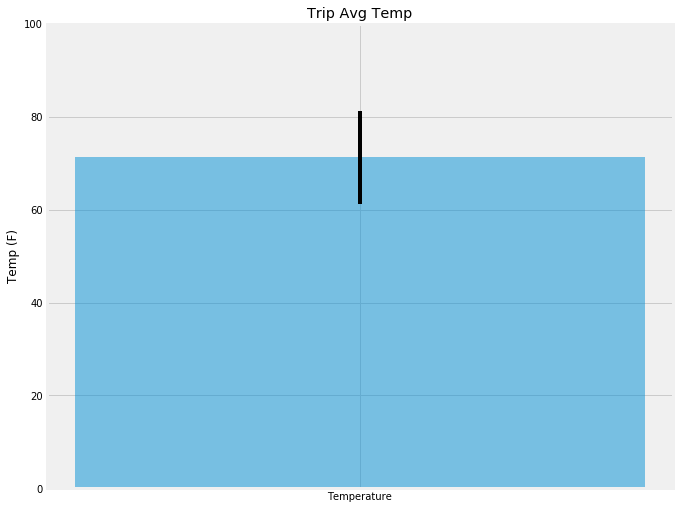

In [102]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

y_axis = trip_dates_avg_temp
y_error = trip_dates_error
plt.bar("Temperature", y_axis, alpha=.5, align = "center", yerr = y_error, width=.01)

# Assign a title to the Bar Chart:
plt.title('Trip Avg Temp')

# Assign a label to the Y Axis:
plt.ylabel('Temp (F)')
plt.yticks(np.arange(0, 120, 20))

fig= plt.gcf()
fig.subplots_adjust(bottom=0.45)
fig.set_size_inches(10, 15) 

# Save the Bar Chart in the Output folder:
plt.savefig("Output/BAR_CHART_Trip_Average_Temperature.png")

In [103]:
#==============
# Analysis
#=============

# We picked a set of fictitious trip dates: 12/01/2017 to 12/09/2017.
# We then analyzed the temperatures for the same Month-Date combination but for the prior year, from this dataset. 
# So, in this case, we analyzed the temperatures for the dates: 12/01/16 to 12/09/16.
# -- The minimum temperature was 67.00 degrees Farenheit.
# -- The average temperature was 71.32 degrees Farenheit.
# -- The maximum temperature was 77.00 degrees Farenheit.


In [104]:
## =========================================================================
## TOTAL RAINFALL PER STATION FOR TRIP DATES
## =========================================================================

In [105]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

total_rainfall_trip_dates = [Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp)]

results_total_rainfall_trip_dates = session.query(*total_rainfall_trip_dates).\
    filter(Measurement.station == Station.station).\
    filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).\
    group_by(Measurement.station).\
    order_by(func.sum(Measurement.prcp).desc()).all()

def calc_total_rainfall(start_date, end_date):
    return results_total_rainfall_trip_dates


# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

def calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()


# Specify the trip start and end dates
# The Proposed trip start and dates are '2017-12-01' to '2017-12-09'
# So from the dataset we get data from a year ago i.e. '2016-12-01' to '2016-12-09'

start_date = '2016-12-01' 
end_date = '2016-12-09'


# Print the minimum, average and maximum temperature 
# for the trip start and end dates

print(calc_temps(start_date, end_date))

start_date = '2016-12-01' 
end_date = '2016-12-09'

# Calculate the total rainfall for the trip dates by Station:

calc_total_rainfall(start_date, end_date)

[(67.0, 71.32203389830508, 77.0)]


[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  5.99),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  2.25),
 ('USC00513117',
  'KANEOHE 838.1, HI US',
  21.4234,
  -157.8015,
  14.6,
  1.6700000000000002),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  1.21),
 ('USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  1.1800000000000002),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  1.04),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.27)]

In [106]:
#==============
# Analysis
#=============

# We picked a set of fictitious trip dates: 12/01/2017 to 12/09/2017.
# We then analyzed the precipitation levels for the same Month-Date combination but for the prior year, from this dataset. 
# So, in this case, we analyzed the precipitation levels for the dates: 12/01/16 to 12/09/16.
# The results by station were as follows:
# USC00516128: 5.99
# USC00519281: 2.25
# USC00513117: 1.67
# USC00514830: 1.21
# USC00519397: 1.18
# USC00519523: 1.04
# USC00517948: 0.27



In [107]:
## =========================================================================
## DAILY NORMALS
## =========================================================================

In [108]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data 
# matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [109]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

def calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()


# Specify the trip start and end dates
# The Proposed trip start and dates are '2017-12-01' to '2017-12-09'
# So from the dataset we get data from a year ago i.e. '2016-12-01' to '2016-12-09'

start_date = '2016-12-01' 
end_date = '2016-12-09'


# Print the minimum, average and maximum temperature 
# for the trip start and end dates

print(calc_temps(start_date, end_date))

start_date = '2016-12-01' 
end_date = '2016-12-09'

import datetime as dt

start_date_formatted = dt.datetime.strptime(start_date, '%Y-%m-%d')
end_date_formatted = dt.datetime.strptime(end_date, '%Y-%m-%d')

print(start_date_formatted)
print(end_date_formatted)

[(67.0, 71.32203389830508, 77.0)]
2016-12-01 00:00:00
2016-12-09 00:00:00


In [110]:
# Use the start and end date to create a range of dates
# Strip off the year and save a list of %m-%d strings
# Loop through the list of %m-%d strings and calculate the normals for each date
# Push each tuple of calculations into a list called `normals`

start_date = '2016-12-01' 
end_date = '2016-12-09'

start_date_formatted = dt.datetime.strptime(start_date, '%Y-%m-%d')
end_date_formatted = dt.datetime.strptime(end_date, '%Y-%m-%d')


tripdates = []
normals =[]

while (start_date_formatted <= end_date_formatted):
    tripdates.append(dt.datetime.strftime(start_date_formatted,'%m-%d'))
    datestr = dt.datetime.strftime(start_date_formatted,'%m-%d')
    normals.append(list(np.ravel(daily_normals(datestr))))
    start_date_formatted = start_date_formatted + dt.timedelta(days = 1)

normals

[[65.0, 71.91666666666667, 78.0],
 [62.0, 71.32692307692308, 77.0],
 [67.0, 72.88679245283019, 79.0],
 [66.0, 72.17647058823529, 81.0],
 [64.0, 70.92156862745098, 78.0],
 [61.0, 69.3921568627451, 78.0],
 [58.0, 69.2, 79.0],
 [60.0, 70.27450980392157, 83.0],
 [64.0, 71.90196078431373, 80.0]]

In [111]:
# Load the previous query results into a Pandas DataFrame

df = pd.DataFrame(normals, columns=['Min_Temp','Avg_Temp','Max_Temp'])
df

,Min_Temp,Avg_Temp,Max_Temp
0,65.0,71.916667,78.0
1,62.0,71.326923,77.0
2,67.0,72.886792,79.0
3,66.0,72.176471,81.0
4,64.0,70.921569,78.0
5,61.0,69.392157,78.0
6,58.0,69.200000,79.0
7,60.0,70.274510,83.0
8,64.0,71.901961,80.0


In [112]:
# Add the `trip_dates` range 
# Set the index equal to the Date


df["Date"] = tripdates
df=df.set_index("Date")
df

,Min_Temp,Avg_Temp,Max_Temp
Date,,,
12-01,65.0,71.916667,78.0
12-02,62.0,71.326923,77.0
12-03,67.0,72.886792,79.0
12-04,66.0,72.176471,81.0
12-05,64.0,70.921569,78.0
12-06,61.0,69.392157,78.0
12-07,58.0,69.200000,79.0
12-08,60.0,70.274510,83.0
12-09,64.0,71.901961,80.0


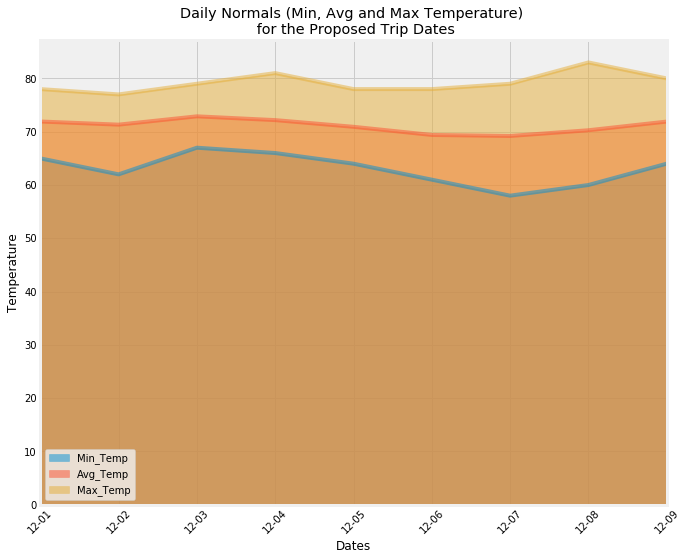

In [113]:
# Plot the daily normals as an area plot with `stacked=False`
df.plot.area(stacked=False)
plt.xticks(rotation=45)

# Assign a label to the X Axis:
plt.xlabel("Dates")

# Assign a label to the Y Axis:
plt.ylabel("Temperature")

# Assign a title to the Stacked Chart:
plt.title("Daily Normals (Min, Avg and Max Temperature) \n for the Proposed Trip Dates")

fig= plt.gcf()
fig.subplots_adjust(bottom=0.45)
fig.set_size_inches(10, 15) 

# Save the Stacked Chart in the Output folder:
plt.savefig("Output/STACKED_CHART_Daily_Normals.png")

In [114]:
#==============
# Analysis
#=============

# We picked a set of fictitious trip dates: 12/01/2017 to 12/09/2017.
# We then analyzed the temperatures for the same Month-Date combination but for all available prior years from thsi dataset.
# So, in this case, we analyzed the temperatures for the dates: 12/01 to 12/09 for the years 2010 to 2016.
# The results were as follows:

#Date	MinTemp	AvgTemp	Max_Temp
# 12/1	65.00 	71.92 	78.00 
# 12/2	62.00 	71.33 	77.00 
# 12/3	67.00 	72.89 	79.00 
# 12/4	66.00 	72.18 	81.00 
# 12/5	64.00 	70.92 	78.00 
# 12/6	61.00 	69.39 	78.00 
# 12/7	58.00 	69.20 	79.00 
# 12/8	60.00 	70.27 	83.00 
# 12/9	64.00 	71.90 	80.00 



In [115]:
# ====================================================================================
# DUE DILIGENCE - CLOSE THE SESSION AND RELEASE THE ENGINE CREATED FOR THIS ANALYSIS
# ====================================================================================

In [116]:
# Close the Session

session.close

<bound method Session.close of <sqlalchemy.orm.session.Session object at 0x00000152D07B3F88>>

In [117]:
# Release the Engine

engine.dispose()

In [ ]:
# ===========================================================
# THIS IS THE END OF THE JUPYTER NOTEBOOK ANALYSIS
# ===========================================================